### Programming Assignment 2 
# **Linear Regression**

AJ Dave A. Obis and Juan Francis C. Tuatis

In [5]:
# Import Libraries to be used
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Import the dataset to be used
eed_pd = pd.read_excel('ENB2012_data.xlsx', engine = 'openpyxl')

### Initial Visualization

In [6]:
# Rename the columns 
eed_pd.rename(columns={ 'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace=True)

# Show head
eed_pd.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Figure size 1000x1000 with 0 Axes>

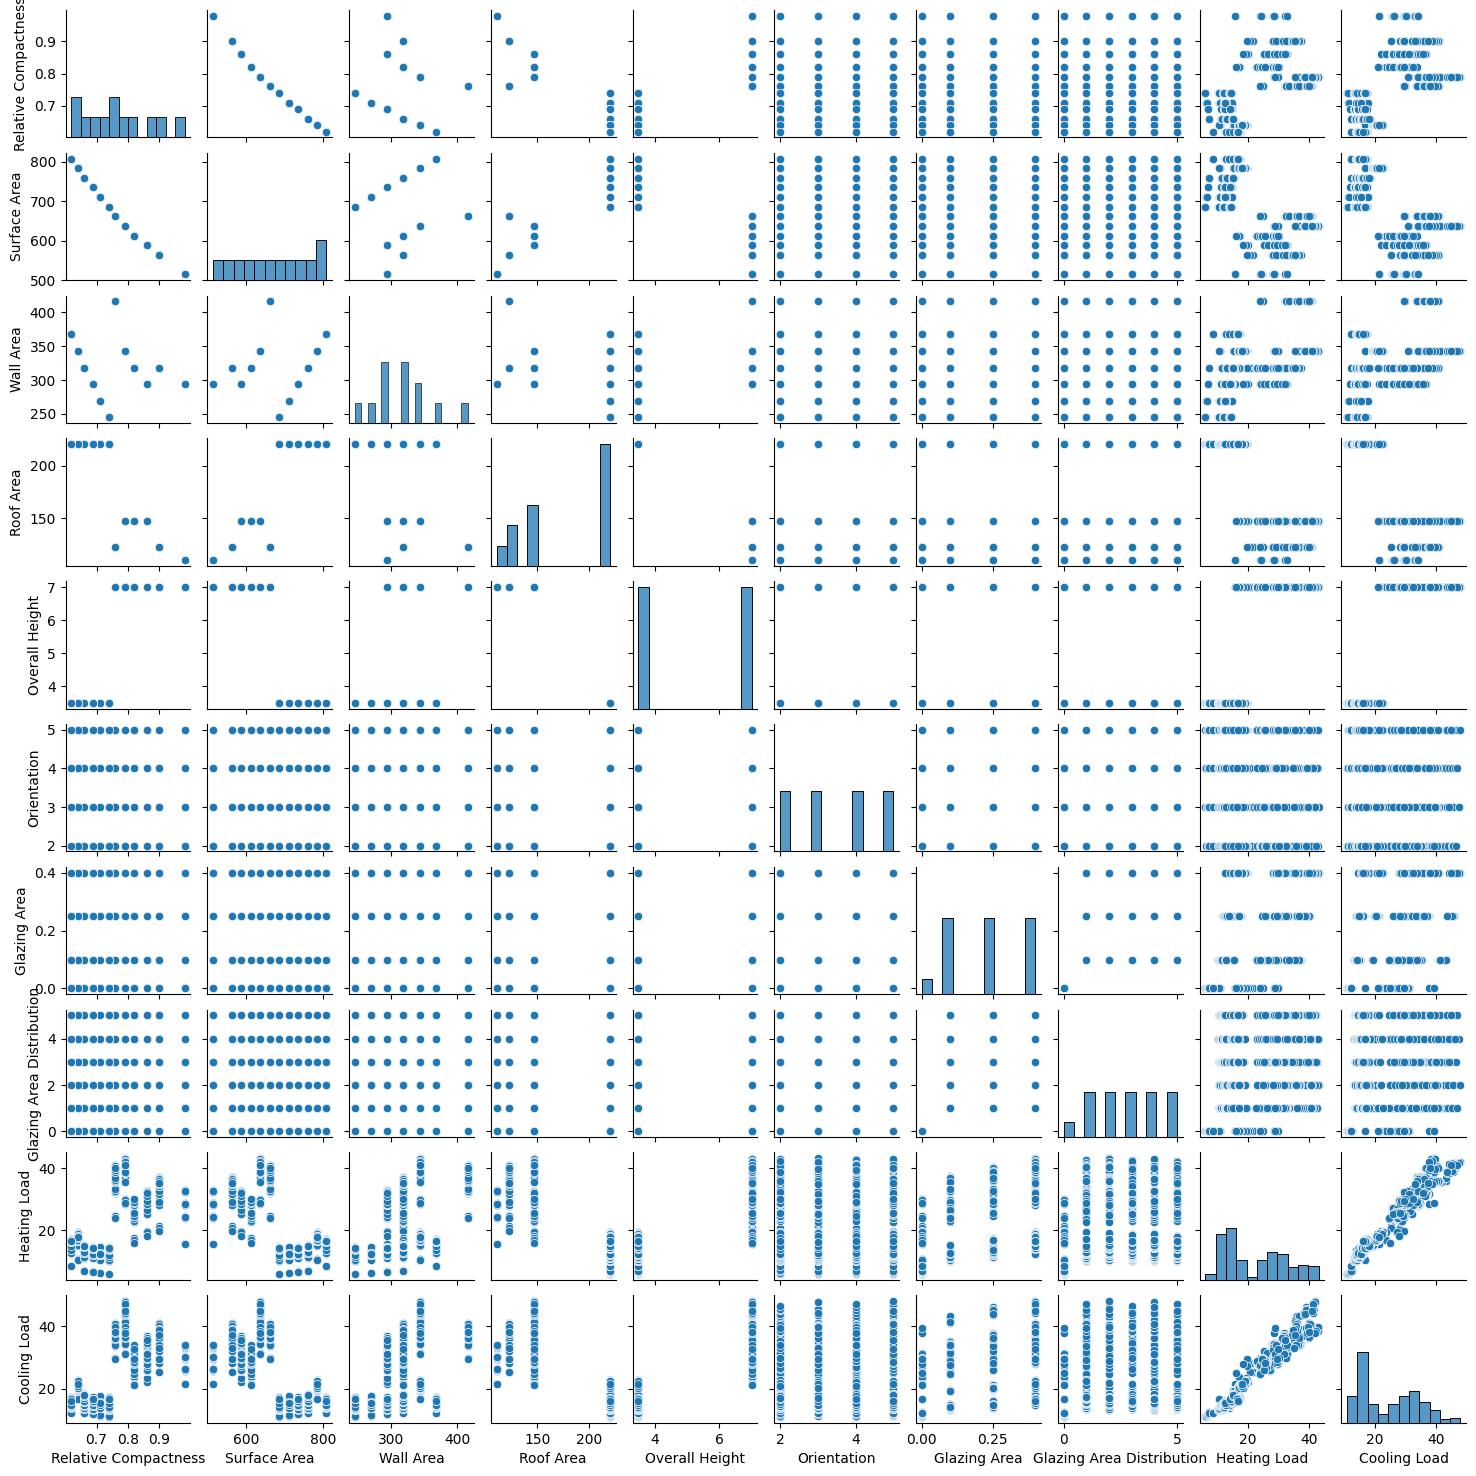

In [3]:
# Generate a pair plot for the Energy Efficiency dataset
plt.figure(figsize=(10, 10))
sns.pairplot(eed_pd, height=1.5)

# Show the plot
plt.show()

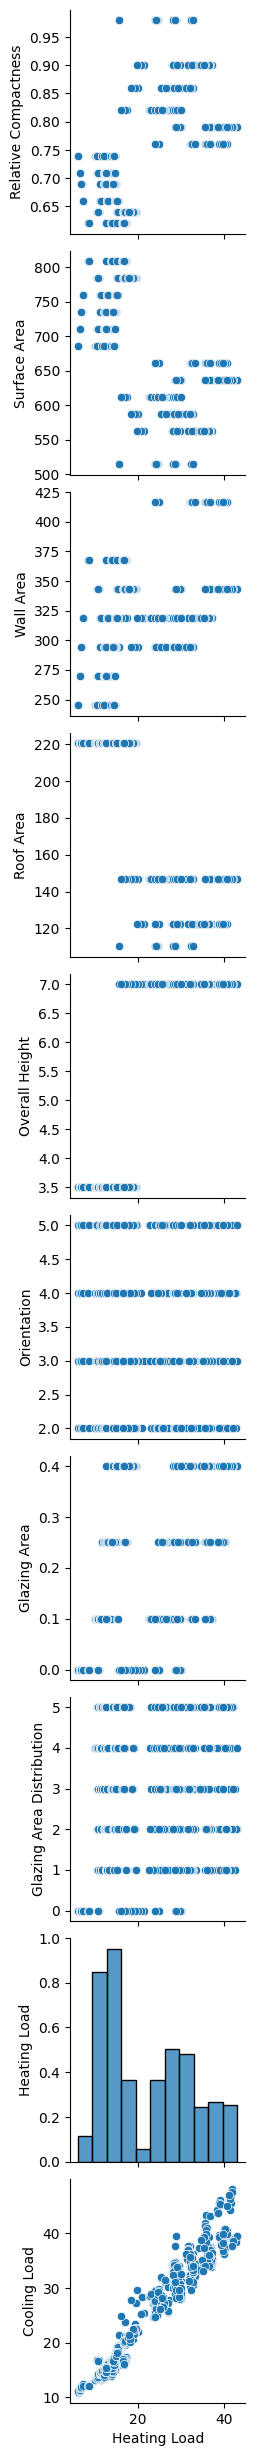

In [4]:
# Isolating the Heating Load column
heating_load = 'Heating Load'

# Generate a pair plot including only the target column with all others
sns.pairplot(eed_pd, x_vars = [heating_load], y_vars = eed_pd.columns, height = 2.5)

# Show the plot
plt.show()

#### This plots showcase the relationship of different attributes from each other. In the second plot, the relation of different attributes and the building load of a building is isolated to further examine the correlation between them.

# **Guidelines**
## 1. Split the samples into 60% training, 20% validation, and 20% testing data at random


In [7]:
# Split the original dataset "eed_pd": 60% Training, 40% Remaining (Validation and Testing)
train_data, temp_data = train_test_split(eed_pd, test_size = 0.4, random_state = 10)

# Now split the "temp_data" or the 40% remaining data for validation and testing (20% each)
val_data, test_data = train_test_split(temp_data, test_size = 0.5, random_state = 10)

# Data Standardization 
scaler = StandardScaler()

# Fit the scaler only on the training data and transform it
# (Calculates mean and std on training data only)
# Why: To prevent data leakage, we ensure that the scaler is only fitted on the training data.
# The validation and test sets should remain unseen during training.
train_data_scaled = scaler.fit_transform(train_data)

# Transform validation and test sets using the same scaler
# To ensure that the model sees the validation and test sets as "unseen" data,
# the transformation is done using the parameters (mean and std) calculated from the training set.
validation_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

# Convert the scaled data back into DataFrames
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns)
validation_data_scaled = pd.DataFrame(validation_data_scaled, columns=val_data.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Print size for each split data
print(f"Original set size: {len(eed_pd)} samples")
print(f"Training set size:  {len(train_data)} samples")
print(f"Validation set size: {len(val_data)} samples")
print(f"Test set size: {len(test_data)} samples")


Original set size: 768 samples
Training set size:  460 samples
Validation set size: 154 samples
Test set size: 154 samples


#### The code outlines the process of splitting a dataset into training, validation, and testing subsets. From the original data with 768 samples, it was divided into 3 parts. First being the training data which consist of 460 samples (60% of the original data size). As for the remaining 40%, it is divided into 2. The validation amd testing data, both of which has 154 samples. It ensures that sefficient data for training while keeping separate datasetsfor the tuning and evaluation. 

#### Dividing the original data into parts helps the model to be more accurate and avioding the model to be overfitted to the data and failing to notice trends or patterns. 

#### Standardizing ensures that features are on the same scale. This is only fitted on the training data to compute the mean and standard deviation. While validation and test data are transformed using the same scaler without refiting to ensure that the model remains unbiased.

## 2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)


In [9]:
# from the standardized training data
X_train = train_data_scaled.drop(columns=['Heating Load', 'Cooling Load']) 
y1_train = train_data['Heating Load']

# from the standardized validation data
X_val = validation_data_scaled.drop(columns=['Heating Load', 'Cooling Load']) 
y1_val = val_data['Heating Load'] 

# from the standardized test data
X_test = test_data_scaled.drop(columns=['Heating Load', 'Cooling Load'])  # Drop target columns from features
y1_test = test_data['Heating Load']  


# Define 10 different choices of regularization parameters (alphas)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

best_alpha = None
best_r2 = -float('inf')


# Store all the alpha and R2 values for printing later
results = []

# Iterate over each alpha value to train the Ridge model
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    
    # Train the model using the training data
    ridge_model.fit(X_train, y1_train)
    
    # Predict the heating load for the validation set
    y1_val_pred = ridge_model.predict(X_val)
    
    # Calculate how accurate the predictions are using R² score
    r2_val = r2_score(y1_val, y1_val_pred)
    
    # Store the alpha and corresponding R² score
    results.append((alpha, r2_val))
    
    # Get the best alpha
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha

# Print all the alpha values and their corresponding R² scores
for alpha, r2 in results:
    print(f"Alpha: {alpha}, R² score: {r2:.6f}")

# Output the best alpha and corresponding R² score
print(f"Best alpha: {best_alpha} with R² score: {best_r2:.4f}")


Alpha: 1e-05, R² score: 0.902555
Alpha: 0.0001, R² score: 0.902555
Alpha: 0.001, R² score: 0.902555
Alpha: 0.01, R² score: 0.902552
Alpha: 0.1, R² score: 0.902523
Alpha: 1, R² score: 0.902027
Alpha: 5, R² score: 0.899291
Alpha: 50, R² score: 0.878411
Alpha: 100, R² score: 0.864925
Alpha: 500, R² score: 0.770961
Best alpha: 1e-05 with R² score: 0.9026


#### This part demonstrate the hyperparameter tuning for the ridge regression by iteating over a predefined set of regularization parameteres (alpha). The goal is to find the best value for alpha that maximizes the R2 score on the validation dataset.

#### "X_train" features the standardized values for training, while droping the target columns (heating load and cooling load). "X_val" and "X_test" standardized the features for validation and testing. As for the "y1_train", "y1_val", and "y1_test" the "heating load" is selected to be the target variable to train, validate, and test.

#### This assumes that "Heating Load" and "Cooling Load" are the only target variables and drops it accordingly from the feature set.

#### Values used for the alpha was assigned. After defining the values for alpha, the program will print the value of alpha together with the corressponding R2 score on validation. Afterwards, the best alpha will be selected based on the highest R2 score.

## 3. Make one final evaluation on the test data

In [10]:
# Define 10 different choices of regularization parameters (alphas)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y1_train_val = pd.concat([y1_train, y1_val])

# Initialize a dictionary to store R² scores for each alpha
alpha_r2_scores = {}

# Evaluate the model for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_val, y1_train_val)
    y1_test_pred = model.predict(X_test)
    r2 = r2_score(y1_test, y1_test_pred)
    alpha_r2_scores[alpha] = r2

# Find the best alpha (highest R² score)
best_alpha = max(alpha_r2_scores, key=alpha_r2_scores.get)
best_r2 = alpha_r2_scores[best_alpha]

# Print all alphas and their corresponding R² scores
for alpha, r2 in alpha_r2_scores.items():
    print(f"Alpha: {alpha}, R² score: {r2:.10f}")

# Print the best alpha and its R² score
print(f"\nBest alpha: {best_alpha}")
print(f"R² score with best alpha: {best_r2:.4f}")

# Train the final model using the best alpha and combined training + validation data
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y1_train_val)

# Predict the heating load on the test data
y1_test_pred = final_model.predict(X_test)

# Calculate the R² score for the test data
r2_test = r2_score(y1_test, y1_test_pred)

# Print the R² score for the test data
print(f"\nFinal R² score on the test data (using best alpha {best_alpha}): {r2_test:.6f}")


Alpha: 1e-05, R² score: 0.9290524249
Alpha: 0.0001, R² score: 0.9290524178
Alpha: 0.001, R² score: 0.9290523466
Alpha: 0.01, R² score: 0.9290516127
Alpha: 0.1, R² score: 0.9290422115
Alpha: 1, R² score: 0.9288260467
Alpha: 5, R² score: 0.9273596017
Alpha: 50, R² score: 0.9116607399
Alpha: 100, R² score: 0.9006240338
Alpha: 500, R² score: 0.8338442566

Best alpha: 1e-05
R² score with best alpha: 0.9291

Final R² score on the test data (using best alpha 1e-05): 0.929052


#### In this step, the students used the test data that was previously split but is not yet used in training the model to perform the final evaluation of the model's performance. Students tried to have the model predict the outputs using the new inputs from the test data. After that, the students evaluated the model's accuracy and performance by comparing predicted outputs to actual outputs from the test data. The R² scores for all alphas were also examined and it is still evident that alpha 1e-05 has the highest r2 score. 

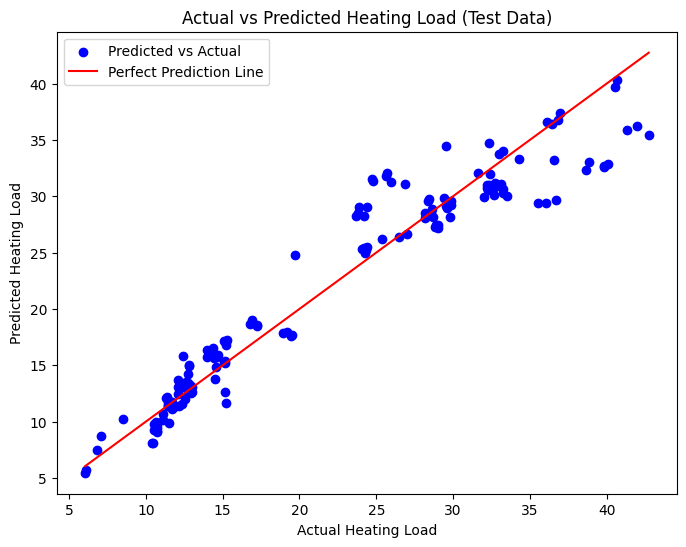

In [11]:
# For visualization

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted values
plt.scatter(y1_test, y1_test_pred, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line (y = x)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load (Test Data)')
plt.legend()

# Show the plot
plt.show()

#### As a further evaluation, the students sought to show the model's performance by generating a plot comparing the model's predicted results (shown in blue dots) to the perfect prediction line (red diagonal line). Looking at it, while not perfect, the model performs well.

## 4. What are the best model's coefficients and intercepts, and its training, validation, and testing accuracy?

In [12]:
# 1. Get the model's coefficients and intercept
coefficients = final_model.coef_  # Coefficients of the features
intercept = final_model.intercept_  # Intercept term

print("Coefficients of the final model:", coefficients)
print("Intercept of the final model:", intercept)

# 2. Calculate R² score for training data
y1_train_val_pred = final_model.predict(X_train_val)  # Predict on the combined training + validation set
r2_train = r2_score(y1_train_val, y1_train_val_pred)
print(f"R² score on the training data (combined training + validation): {r2_train:.4f}")

# 3. Calculate R² score for the test data
y1_test_pred = final_model.predict(X_test)  # Predict on the test data
r2_test = r2_score(y1_test, y1_test_pred)
print(f"Final R² score on the test data: {r2_test:.4f}")

# 4. Print the validation R² score
print(f"Best R² score on the validation data: {best_r2:.4f}")


Coefficients of the final model: [-6.7293171  -3.71664496  0.77172076 -3.93876453  7.2735229  -0.08302893
  2.64756866  0.37560507]
Intercept of the final model: 22.21755195067547
R² score on the training data (combined training + validation): 0.9128
Final R² score on the test data: 0.9291
Best R² score on the validation data: 0.9291


#### Using the available codes and algorithms, students were able to obtain the best model's coefficients, which are [-6.7293171 -3.71664496 0.77172076 -3.93876453 7.2735229 -0.08302893 2.64756866 0.37560507], with an intercept of 22.218. The R2 scores were calculated to determine training, validation, and testing accuracy, and the results were 0.9128, 0.9291, and 0.9291, respectively.


## 5. What are the top 5 features among X1 to X8?

In [13]:
# Extract the coefficients of the trained model
coefficients = ridge_model.coef_.flatten()  # Flatten the coefficient array if it's in 2D

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients (importance)
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head()

# Print the top 5 features and their coefficients
print("Top 5 most important features for predicting Heating Load:")
print(top_features[['Feature', 'Coefficient']])

Top 5 most important features for predicting Heating Load:
          Feature  Coefficient
4  Overall Height     2.273230
3       Roof Area    -1.973430
2       Wall Area     1.876507
6    Glazing Area     1.262535
1    Surface Area    -1.094218


#### The top five features were determined by comparing the absolute value of the features' coefficients and sorting them from highest to lowest. The results show that the top five features with the highest coefficients are overall height, roof area, wall area, glazing area, and surface area.


## 6. If you repeat the procedure above using only the 5 top features, what are the results?

In [14]:
eed_pd1 = eed_pd.drop(["Relative Compactness", "Glazing Area Distribution", "Orientation"], axis = 1)
eed_pd1.head()

,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load
0,514.5,294.0,110.25,7.0,0.0,15.55,21.33
1,514.5,294.0,110.25,7.0,0.0,15.55,21.33
2,514.5,294.0,110.25,7.0,0.0,15.55,21.33
3,514.5,294.0,110.25,7.0,0.0,15.55,21.33
4,563.5,318.5,122.50,7.0,0.0,20.84,28.28


## Repeat the previous steps 

In [15]:
# Split the new dataset "eed_pd1": 60% Training, 40% Remaining (Validation and Testing)
train_data, temp_data = train_test_split(eed_pd1, test_size = 0.4, random_state = 10)

# Now split the "temp_data" or the 40% remaining data for validation and testing (20% each)
val_data, test_data = train_test_split(temp_data, test_size = 0.5, random_state = 10)

# Data Standardization 
scaler = StandardScaler()

# Fit the scaler only on the training data and transform it
train_data_scaled = scaler.fit_transform(train_data)

# Transform validation and test sets using the same scaler
validation_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

# Convert the scaled data back into DataFrames
train_data_scaled1 = pd.DataFrame(train_data_scaled, columns=train_data.columns)
validation_data_scaled1 = pd.DataFrame(validation_data_scaled, columns=val_data.columns)
test_data_scaled1 = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Print size for each split data
print(f"Original set size: {len(eed_pd1)} samples")
print(f"Training set size:  {len(train_data)} samples")
print(f"Validation set size: {len(val_data)} samples")
print(f"Test set size: {len(test_data)} samples")


Original set size: 768 samples
Training set size:  460 samples
Validation set size: 154 samples
Test set size: 154 samples


In [16]:
# from the training data
X_train1 = train_data_scaled1.drop(columns=['Heating Load', "Cooling Load"])
y1_train1 = train_data_scaled1['Heating Load']

# from the validation data
X_val1 = validation_data_scaled1.drop(columns=['Heating Load', 'Cooling Load'])
y1_val1 = validation_data_scaled1['Heating Load']

# from the test data
X_test1 = test_data_scaled1.drop(columns=['Heating Load', 'Cooling Load'])
y1_test1 = test_data_scaled1['Heating Load']


# Define 10 different choices of regularization parameters (alphas)
alphas1 = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

best1_alpha = None
best1_r2 = -float('inf')


# Store all the alpha and R2 values for printing later
results1 = []

# Iterate over each alpha value to train the Ridge model
for alpha1 in alphas1:
    ridge_model1 = Ridge(alpha=alpha1)  # Use alpha1, not alpha
    ridge_model1.fit(X_train1, y1_train1)
    
    # Predict the heating load for the validation set
    y1_val_pred1 = ridge_model1.predict(X_val1)
    
    # Calculate how accurate the predictions are using R² score
    r2_val1 = r2_score(y1_val1, y1_val_pred1)
    
    # Store the alpha and corresponding R² score
    results1.append((alpha1, r2_val1))
    
    # Get the best alpha
    if r2_val1 > best1_r2:  # Compare with best1_r2, not best_r2
        best1_r2 = r2_val1
        best1_alpha = alpha1

# Print all the alpha values and their corresponding R² scores
for alpha1, r2 in results1:
    print(f"Alpha: {alpha1}, R² score: {r2:.10f}")

# Output the best alpha and corresponding R² score
print(f"Best alpha: {best1_alpha} with R² score: {best1_r2:.4f}")


Alpha: 1e-05, R² score: 0.8955751348
Alpha: 0.0001, R² score: 0.8955750925
Alpha: 0.001, R² score: 0.8955746686
Alpha: 0.01, R² score: 0.8955704258
Alpha: 0.1, R² score: 0.8955275787
Alpha: 1, R² score: 0.8950631776
Alpha: 5, R² score: 0.8926364633
Alpha: 50, R² score: 0.8756107284
Alpha: 100, R² score: 0.8648398588
Alpha: 500, R² score: 0.7690666765
Best alpha: 1e-05 with R² score: 0.8956


In [17]:
# Define 10 different choices of regularization parameters (alphas)
alphas1 = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 50, 100, 500]

# Combine the training and validation data
X_train_val1 = pd.concat([X_train1, X_val1])
y1_train_val1 = pd.concat([y1_train1, y1_val1])

# Initialize a dictionary to store R² scores for each alpha
alpha_r2_scores1 = {}

# Evaluate the model for each alpha
for alpha1 in alphas1:
    model1 = Ridge(alpha=alpha1)
    model1.fit(X_train_val1, y1_train_val1)
    y1_test_pred1 = model1.predict(X_test1)
    r2_1 = r2_score(y1_test1, y1_test_pred1)
    alpha_r2_scores1[alpha1] = r2_1

# Find the best alpha (highest R² score)
best_alpha1 = max(alpha_r2_scores1, key=alpha_r2_scores1.get)
best_r2_1 = alpha_r2_scores1[best_alpha1]

# Print all alphas and their corresponding R² scores
for alpha1, r2 in alpha_r2_scores1.items():
    print(f"Alpha: {alpha1}, R² score: {r2:.10f}")

# Print the best alpha and its R² score
print(f"\nBest alpha: {best_alpha1}")
print(f"R² score with best alpha: {best_r2_1:.4f}")

# Train the final model using the best alpha and combined training + validation data
final_model1 = Ridge(alpha=best_alpha1)
final_model1.fit(X_train_val1, y1_train_val1)

# Predict the heating load on the test data
y1_test_pred1 = final_model1.predict(X_test1)

# Calculate the R² score for the test data
r2_test1 = r2_score(y1_test1, y1_test_pred1)

# Print the R² score for the test data
print(f"\nFinal R² score on the test data (using best alpha {best_alpha1}): {r2_test1:.6f}")


Alpha: 1e-05, R² score: 0.9255712554
Alpha: 0.0001, R² score: 0.9255712465
Alpha: 0.001, R² score: 0.9255711571
Alpha: 0.01, R² score: 0.9255702591
Alpha: 0.1, R² score: 0.9255608806
Alpha: 1, R² score: 0.9254307913
Alpha: 5, R² score: 0.9243386859
Alpha: 50, R² score: 0.9112464834
Alpha: 100, R² score: 0.9028288701
Alpha: 500, R² score: 0.8357851202

Best alpha: 1e-05
R² score with best alpha: 0.9256

Final R² score on the test data (using best alpha 1e-05): 0.925571


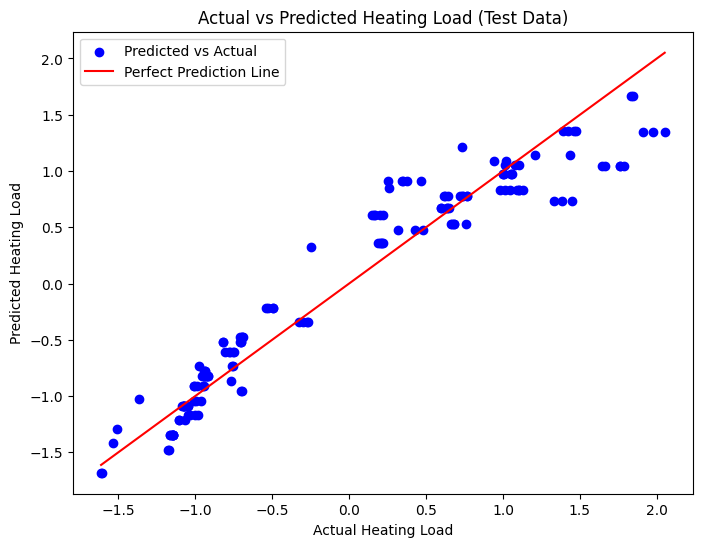

In [18]:
# For visualization

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted values
plt.scatter(y1_test1, y1_test_pred1, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line (y = x)
plt.plot([min(y1_test1), max(y1_test1)], [min(y1_test1), max(y1_test1)], color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load (Test Data)')
plt.legend()

# Show the plot
plt.show()

#### Repeating the previous steps while only including the top 5 features in the model results in slightly lower test R2 scores than the first model from the previous steps. The plot also shows the difference in outputs with the new model compared to the first.


## Guide Questions
### 1. What is the impact of removing certain features on the model’s performance?

>Answer: Removing certain features from a dataset can have a significant impact on the performance of a learning model. It can either cause underfitting by losing valuable information or improve performance by removing irrelevant features or data. In our case, removing features other than the top 5 leads to a slightly lower test R² score compared to the original model with all the features. The best test R² score is 0.9256, which is close to the first score of 0.9291 with all features, indicating both the model's performance are almost identical. By removing such features, the model's complexity can be minimized by using only the relevant features and removing the rest, while still producing the same results. However, removing such features should be done with caution, as it may result in unintended effects.


### 2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?

>Answer: Splitting data into training, validation and testing sets, improves the model's performance reliability by setting more parameters when training. The training data will be used primarily to help the algorithm in learning patterns and relationships in the data. With the validation, these examples will be use to fine-tune the model and optimize its parameters. It improves  the model's performance on the problem without being part of the training data. Lastly, the testing data serves as the final, unbiased evaluation to give an evaluation on the final model, this are set of unseen data after the model has been trained. Furthermore, dividing the dataset into three parts avoids the probability of the model being overfitted. Overfitting is when the model is so complex that the model fits the dataset to closely and is sensitive to noise. However, maintaining a right amount of data for training must be considered as well, if the training data is to little the model is classified as underfitting. Underfitted data is too simplistic to represent the underlying relationship in the dataset between the descriptive features and target predictions. 

### 3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?

> Answer: The generalization ability of the model can be assessed by having a test data, which is not used to train the model, be compared with the predictions of the model and look at how close are the model's prediction and real answers from the test data. This can be computed and represented in values such as the R² scores or mean squared error (MSE). This helps us avoid creating a model that is overfitted or is dependent on all data available and fail to achieve real or actual prediction values. This can be done by first splitting the data into training, validation, and test sets before applying it to the model. Furthermore, performing cross-validation and regularization help improve the model in terms of generalization.